In [1]:
import numpy as np 
import pandas as pd 
import os
import re
import json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from keras.layers import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
obj = pd.read_pickle(r'Dataset.p')
data = pd.DataFrame(obj)
data.head()

,Speaker,text,Context,Sarcasm,Humour,Episode_label,Audio_Filename
0,Sahil,"dad, आप अन्दर छुप जाइए. जाइए जाइए जाइए! good....",[कल रात से पेट में जलन और ये दावे में ज्यादा थ...,1,1,E58-D5,audio1African-file0.mp3
1,Indu,नहीं!,[देखना का उपयोग 1 नेक सालाह detee हूं chailenj...,0,1,E58-D5,audio1African-file1.mp3
2,Sahil,अरे छुप जाइये अन्दर!,[bhaeeya gosip nyuj chenal laalach na hona cha...,0,1,E58-D5,audio1African-file2.mp3
3,Indu,नहीं! बहुत गरमी है अन्दर. मैं नहीं छुप सकता ह...,[4 phlor vaalee beejal baad यहां unhonne apane...,0,1,E58-D5,audio1African-file3.mp3
4,Sahil,"तो… तो… क्या? अच्छा. एक काम कीजिए, आप यहीं रह...","[तुम दोनों यह गॉसिप करना बंद करो प्लीज, 4 phlo...",0,0,E58-D5,audio1African-file4.mp3


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data = data.drop(["Context", "Humour", "Episode_label", "Audio_Filename"], axis=1)
data.head()

,Speaker,text,Sarcasm
0,Sahil,"dad, आप अन्दर छुप जाइए. जाइए जाइए जाइए! good....",1
1,Indu,नहीं!,0
2,Sahil,अरे छुप जाइये अन्दर!,0
3,Indu,नहीं! बहुत गरमी है अन्दर. मैं नहीं छुप सकता ह...,0
4,Sahil,"तो… तो… क्या? अच्छा. एक काम कीजिए, आप यहीं रह...",0


In [5]:
data.columns = ['article_link', 'headline', 'is_sarcastic']
data


,article_link,headline,is_sarcastic
0,Sahil,"dad, आप अन्दर छुप जाइए. जाइए जाइए जाइए! good....",1
1,Indu,नहीं!,0
2,Sahil,अरे छुप जाइये अन्दर!,0
3,Indu,नहीं! बहुत गरमी है अन्दर. मैं नहीं छुप सकता ह...,0
4,Sahil,"तो… तो… क्या? अच्छा. एक काम कीजिए, आप यहीं रह...",0
...,...,...,...
15571,Monisha,इनकी बुराई को बुरा लगा हो मास्टर,1
15572,Maya,दुनिया तो पॉइंट एज ये देखो कितनी धूल जमा हो गई...,1
15573,Vithal,माउंट मैंने साफ करने की कोशिश की लेकिन हाथ में...,0
15574,Ila,अंजीर अरे तुम्हारा हाथ नहीं पहुंचता तो निम्न स...,0


In [6]:
def clean_text(text):
    #text = text.lower()
    
    #pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    #text = pattern.sub('', text)
    #text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    #text = emoji.sub(r'', text)
    #text = text.lower()
    #text = re.sub(r"i'm", "i am", text)
    #text = re.sub(r"he's", "he is", text)
    #text = re.sub(r"she's", "she is", text)
    #text = re.sub(r"that's", "that is", text)        
    #text = re.sub(r"what's", "what is", text)
    #text = re.sub(r"where's", "where is", text) 
    #text = re.sub(r"\'ll", " will", text)  
    #text = re.sub(r"\'ve", " have", text)  
    #text = re.sub(r"\'re", " are", text)
    #text = re.sub(r"\'d", " would", text)
    #text = re.sub(r"\'ve", " have", text)
    #text = re.sub(r"won't", "will not", text)
    #text = re.sub(r"don't", "do not", text)
    #text = re.sub(r"did't", "did not", text)
    #text = re.sub(r"can't", "can not", text)
    #text = re.sub(r"it's", "it is", text)
    #text = re.sub(r"couldn't", "could not", text)
    #text = re.sub(r"have't", "have not", text)
    #text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [7]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def CleanTokenize(df):
    head_lines = list()
    lines = df["headline"].values.tolist()
    for line in lines:
        #print(line)
        #print(type(line))
        if line is None:
            pass
        else:
            a = line.split()
            #print(a)
            #print(type(a))
            for i in a:
                head_lines.append(i)
    return head_lines

head_lines = CleanTokenize(data)
head_lines[0:20]

['dad,',
 'आप',
 'अन्दर',
 'छुप',
 'जाइए.',
 'जाइए',
 'जाइए',
 'जाइए!',
 'good.',
 'और',
 'सुनिए,',
 'जब',
 'तक',
 'मैं',
 'न',
 'कहूँ',
 'आप',
 'please',
 'बहार',
 'मत']

(-0.5, 999.5, 499.5, -0.5)

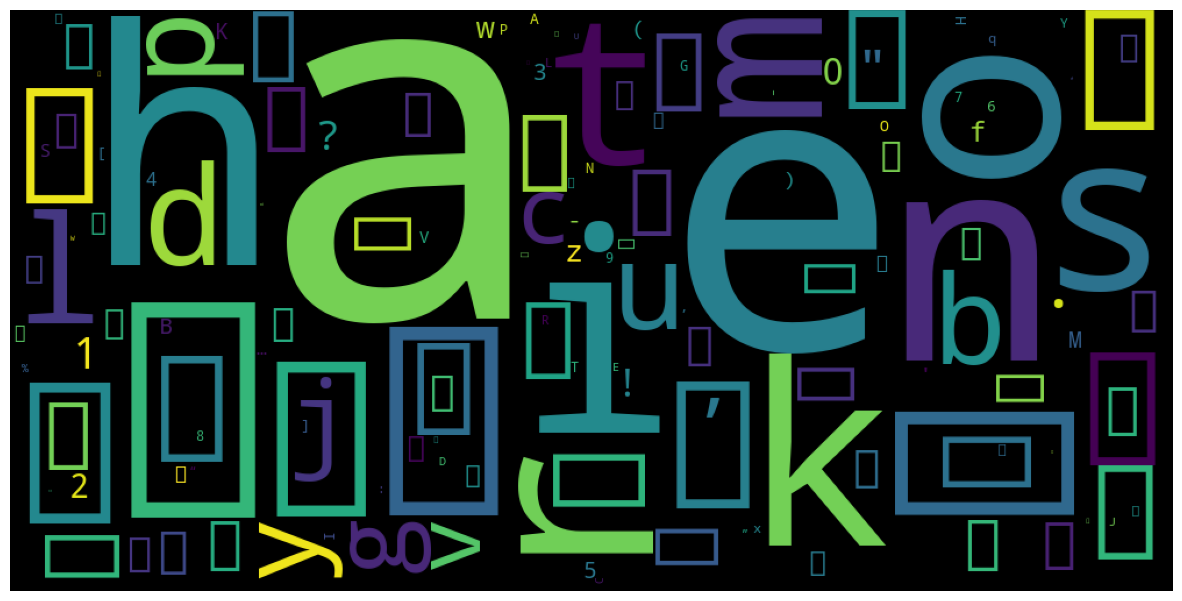

In [8]:
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
pos_data = data.loc[data['is_sarcastic'] == 1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

# Train Test Split


In [9]:
validation_split = 0.2
max_length = 25


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(head_lines)
sequences = tokenizer_obj.texts_to_sequences(head_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - ",len(word_index))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab size -', vocab_size)

lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
sentiment =  data['is_sarcastic'].values

indices = np.arange(lines_pad.shape[0])
np.random.shuffle(indices)
lines_pad = lines_pad[indices]
#sentiment = sentiment[indices]

num_validation_samples = int(validation_split * lines_pad.shape[0])

X_train_pad = lines_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = lines_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

unique tokens -  19394
vocab size - 19395


In [10]:
print('Shape of X_train_pad:', X_train_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test_pad.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (272180, 25)
Shape of y_train: (0,)
Shape of X_test_pad: (68044, 25)
Shape of y_test: (15576,)


In [13]:
embeddings_index = {}
embedding_dim = 100
GLOVE_DIR = "extract"
f = open(os.path.join(GLOVE_DIR, 'glove.twitter.27B.100d.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

FileNotFoundError: [Errno 2] No such file or directory: 'extract\\glove.twitter.27B.100d.txt'

In [14]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
c = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)

0


In [ ]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary of the built model...')
print(model.summary())

In [ ]:
history = model.fit(X_train_pad, y_train, batch_size=32, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)

In [ ]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def predict_sarcasm(s):
    x_final = pd.DataFrame({"headline":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer_obj.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
    pred = model.predict(test_review_pad)
    pred*=100
    if pred[0][0]>=50: return "It's a sarcasm!" 
    else: return "It's not a sarcasm."

In [ ]:
predict_sarcasm("You just damaged my painting, well done!")

In [ ]:
predict_sarcasm("He is Raj, he is a good person.")

In [ ]:
predict_sarcasm("Sarcasm is very easy to detect.")